# house prices advanced regression techniques

In [1]:
!pip install torch scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
import random
import numpy as np

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
#    torch.manual_seed(seed)
#    torch.cuda.manual_seed(seed)
#    torch.backends.cudnn.deterministic = True
#    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [3]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
!rm -f *.zip *.csv *.txt

In [5]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0%|                                                | 0.00/199k [00:00<?, ?B/s]
100%|█████████████████████████████████████████| 199k/199k [00:00<00:00, 677MB/s]


In [6]:
!unzip -q house-prices-advanced-regression-techniques.zip

In [7]:
train  = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [10]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [12]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [15]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [16]:
fillna_cols = []
for col in train:
    if train[col].isnull().sum() > 0:
        if( train[col].dtype == 'object' ):
            print(col, train[col].unique())
            fillna_cols.append(col)

Alley [nan 'Grvl' 'Pave']
MasVnrType ['BrkFace' nan 'Stone' 'BrkCmn']
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Electrical ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
FireplaceQu [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish ['RFn' 'Unf' 'Fin' nan]
GarageQual ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
PoolQC [nan 'Ex' 'Fa' 'Gd']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [17]:
for col in fillna_cols:
    train[col].fillna('fillna',inplace=True)    

/tmp/ipykernel_20501/2183733632.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna('fillna',inplace=True)


In [18]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,fillna,Reg,Lvl,AllPub,...,0,fillna,fillna,fillna,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,fillna,Reg,Lvl,AllPub,...,0,fillna,fillna,fillna,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,fillna,IR1,Lvl,AllPub,...,0,fillna,fillna,fillna,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,fillna,IR1,Lvl,AllPub,...,0,fillna,fillna,fillna,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,fillna,IR1,Lvl,AllPub,...,0,fillna,fillna,fillna,0,12,2008,WD,Normal,250000


In [19]:
for col in train:
    if train[col].isnull().sum() > 0:
        if( train[col].dtype != 'object' ):
            print(col, train[col].dtype)

LotFrontage float64
MasVnrArea float64
GarageYrBlt float64


In [20]:
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

# 선택된 숫자 타입 컬럼에 대해서만 중앙값으로 결측치 대체
train[numeric_columns] = train[numeric_columns].fillna(train[numeric_columns].median())

In [21]:
fillna_cols = []
for col in test:
    if test[col].isnull().sum() > 0:
        if( test[col].dtype == 'object' ):
            print(col, test[col].unique())
            fillna_cols.append(col)

MSZoning ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]
Alley [nan 'Pave' 'Grvl']
Utilities ['AllPub' nan]
Exterior1st ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' nan 'CBlock']
Exterior2nd ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'Brk Cmn' 'CmentBd'
 'ImStucc' 'Wd Shng' 'AsbShng' 'Stucco' 'CBlock' 'BrkFace' 'AsphShn' nan
 'Stone']
MasVnrType [nan 'BrkFace' 'Stone' 'BrkCmn']
BsmtQual ['TA' 'Gd' 'Ex' 'Fa' nan]
BsmtCond ['TA' 'Po' 'Fa' 'Gd' nan]
BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1 ['Rec' 'ALQ' 'GLQ' 'Unf' 'BLQ' 'LwQ' nan]
BsmtFinType2 ['LwQ' 'Unf' 'Rec' 'BLQ' 'GLQ' 'ALQ' nan]
KitchenQual ['TA' 'Gd' 'Ex' 'Fa' nan]
Functional ['Typ' 'Min2' 'Min1' 'Mod' 'Maj1' 'Sev' 'Maj2' nan]
FireplaceQu [nan 'TA' 'Gd' 'Po' 'Fa' 'Ex']
GarageType ['Attchd' 'Detchd' 'BuiltIn' nan 'Basment' '2Types' 'CarPort']
GarageFinish ['Unf' 'Fin' 'RFn' nan]
GarageQual ['TA' nan 'Fa' 'Gd' 'Po']
GarageCond ['TA' nan 'Fa' 'Gd' 'Po' 

In [22]:
for col in fillna_cols:
    test[col].fillna('fillna',inplace=True)    

/tmp/ipykernel_20501/2817552199.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[col].fillna('fillna',inplace=True)


In [23]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,fillna,Reg,Lvl,AllPub,...,120,0,fillna,MnPrv,fillna,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,fillna,IR1,Lvl,AllPub,...,0,0,fillna,fillna,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,fillna,IR1,Lvl,AllPub,...,0,0,fillna,MnPrv,fillna,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,fillna,IR1,Lvl,AllPub,...,0,0,fillna,fillna,fillna,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,fillna,IR1,HLS,AllPub,...,144,0,fillna,fillna,fillna,0,1,2010,WD,Normal


In [24]:
for col in test:
    if test[col].isnull().sum() > 0:
        if( test[col].dtype != 'object' ):
            print(col, test[col].dtype)

LotFrontage float64
MasVnrArea float64
BsmtFinSF1 float64
BsmtFinSF2 float64
BsmtUnfSF float64
TotalBsmtSF float64
BsmtFullBath float64
BsmtHalfBath float64
GarageYrBlt float64
GarageCars float64
GarageArea float64


In [25]:
numeric_columns = test.select_dtypes(include=['int64', 'float64']).columns

# 선택된 숫자 타입 컬럼에 대해서만 중앙값으로 결측치 대체
test[numeric_columns] = test[numeric_columns].fillna(train[numeric_columns].median())

In [26]:
category_cols = []
for col in train:
    if( train[col].dtype == 'object' ):
        print(col, train[col].unique(), train[col].unique().shape)
        category_cols.append(col)

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH'] (5,)
Street ['Pave' 'Grvl'] (2,)
Alley ['fillna' 'Grvl' 'Pave'] (3,)
LotShape ['Reg' 'IR1' 'IR2' 'IR3'] (4,)
LandContour ['Lvl' 'Bnk' 'Low' 'HLS'] (4,)
Utilities ['AllPub' 'NoSeWa'] (2,)
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] (5,)
LandSlope ['Gtl' 'Mod' 'Sev'] (3,)
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] (25,)
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] (9,)
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] (8,)
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] (5,)
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] (8,)
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] (6,)
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdSh

In [27]:
print(category_cols, len(category_cols))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 43


In [28]:
category_cols = []
for col in test:
    if( test[col].dtype == 'object' ):
        print(col, test[col].unique(), test[col].unique().shape)
        category_cols.append(col)

MSZoning ['RH' 'RL' 'RM' 'FV' 'C (all)' 'fillna'] (6,)
Street ['Pave' 'Grvl'] (2,)
Alley ['fillna' 'Pave' 'Grvl'] (3,)
LotShape ['Reg' 'IR1' 'IR2' 'IR3'] (4,)
LandContour ['Lvl' 'HLS' 'Bnk' 'Low'] (4,)
Utilities ['AllPub' 'fillna'] (2,)
LotConfig ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3'] (5,)
LandSlope ['Gtl' 'Mod' 'Sev'] (3,)
Neighborhood ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' 'IDOTRR'
 'Mitchel' 'Timber' 'MeadowV' 'Veenker'] (25,)
Condition1 ['Feedr' 'Norm' 'PosN' 'RRNe' 'Artery' 'RRNn' 'PosA' 'RRAn' 'RRAe'] (9,)
Condition2 ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery'] (5,)
BldgType ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon'] (5,)
HouseStyle ['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' '1.5Unf'] (7,)
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Flat' 'Mansard' 'Shed'] (6,)
RoofMatl ['CompShg' 'Tar&Grv' 'WdShake' 'WdShngl'] (4,)
Exterior

In [29]:
print(category_cols, len(category_cols))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 43


In [30]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

train[category_cols] = ordinal_encoder.fit_transform(train[category_cols])
test[category_cols] = ordinal_encoder.fit_transform(test[category_cols])

In [31]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3.0,65.0,8450,1.0,2.0,3.0,3.0,0.0,...,0,3.0,4.0,4.0,0,2,2008,8.0,4.0,208500
1,2,20,3.0,80.0,9600,1.0,2.0,3.0,3.0,0.0,...,0,3.0,4.0,4.0,0,5,2007,8.0,4.0,181500
2,3,60,3.0,68.0,11250,1.0,2.0,0.0,3.0,0.0,...,0,3.0,4.0,4.0,0,9,2008,8.0,4.0,223500
3,4,70,3.0,60.0,9550,1.0,2.0,0.0,3.0,0.0,...,0,3.0,4.0,4.0,0,2,2006,8.0,0.0,140000
4,5,60,3.0,84.0,14260,1.0,2.0,0.0,3.0,0.0,...,0,3.0,4.0,4.0,0,12,2008,8.0,4.0,250000


In [32]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2.0,80.0,11622,1.0,2.0,3.0,3.0,0.0,...,120,0,2.0,2.0,3.0,0,6,2010,8.0,4.0
1,1462,20,3.0,81.0,14267,1.0,2.0,0.0,3.0,0.0,...,0,0,2.0,4.0,0.0,12500,6,2010,8.0,4.0
2,1463,60,3.0,74.0,13830,1.0,2.0,0.0,3.0,0.0,...,0,0,2.0,2.0,3.0,0,3,2010,8.0,4.0
3,1464,60,3.0,78.0,9978,1.0,2.0,0.0,3.0,0.0,...,0,0,2.0,4.0,3.0,0,6,2010,8.0,4.0
4,1465,120,3.0,43.0,5005,1.0,2.0,0.0,1.0,0.0,...,144,0,2.0,4.0,3.0,0,1,2010,8.0,4.0


In [33]:
y_data = train[['SalePrice']].values
train.drop(['SalePrice'], axis=1, inplace=True)
X_data = train.values

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

In [35]:
X_data = torch.Tensor(X_data)
y_data = torch.Tensor(y_data)
y_data = y_data.squeeze()

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2) # train과 test를 8:2로 분할

In [37]:
class HousePricesModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(HousePricesModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_size)
        )
        
    def forward(self, x):
        output = self.model(x)
        return output

In [38]:
model = HousePricesModel(80, 1)

In [39]:
n = 0
y = model(X_train[n]).detach() # 더 이상 연산을 추적하지 않는다
print(y, y_train[n])

tensor([64.4609]) tensor(145000.)


In [40]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [41]:
print(model)

HousePricesModel(
  (model): Sequential(
    (0): Linear(in_features=80, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [42]:
model = HousePricesModel(80, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

n_epochs = 10000 # 1000회 학습

avg_loss = 0 
for epoch in range(n_epochs):
    y = model(X_train)
    target = y_train
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print('epoch {}th loss: {}'.format(epoch, loss.data))

epoch 0th loss: 38896066560.0


/home/ubuntu/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([1168])) that is different to the input size (torch.Size([1168, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 1000th loss: 5993667072.0
epoch 2000th loss: 5966565888.0
epoch 3000th loss: 5965872128.0
epoch 4000th loss: 5965675008.0
epoch 5000th loss: 5965518848.0
epoch 6000th loss: 5965359104.0
epoch 7000th loss: 5965199360.0
epoch 8000th loss: 5965060608.0
epoch 9000th loss: 5964971520.0


In [43]:
n = 30
y = model(X_train[n]).detach() # 더 이상 연산을 추적하지 않는다
print(y, y_train[n])

tensor([180691.4062]) tensor(133000.)


In [44]:
model = HousePricesModel(80, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

n_epochs = 10000 # 1000회 학습

list_training_loss = []
list_test_loss = []

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    model.train()
    y = model(X_train)
    loss = criterion(y, y_train).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        model.eval()
        y_pred = model(X_test)
        test_loss = criterion(y_pred, y_test).sum()
        print('epoch {}th training loss: {} test loss: {}'.format(epoch, loss.data, test_loss.data))
        list_training_loss.append(loss.data)
        list_test_loss.append(test_loss.data)

epoch 0th training loss: 38905516032.0 test loss: 39660199936.0


/home/ubuntu/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([292])) that is different to the input size (torch.Size([292, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 1000th training loss: 5968950272.0 test loss: 7681440256.0
epoch 2000th training loss: 5965928960.0 test loss: 7678541312.0
epoch 3000th training loss: 5965638144.0 test loss: 7678312960.0
epoch 4000th training loss: 5965442560.0 test loss: 7678153216.0
epoch 5000th training loss: 5965260288.0 test loss: 7677999104.0
epoch 6000th training loss: 5965093888.0 test loss: 7677783040.0
epoch 7000th training loss: 5964971520.0 test loss: 7677725184.0
epoch 8000th training loss: 5964893696.0 test loss: 7677502976.0
epoch 9000th training loss: 5964853760.0 test loss: 7677334016.0


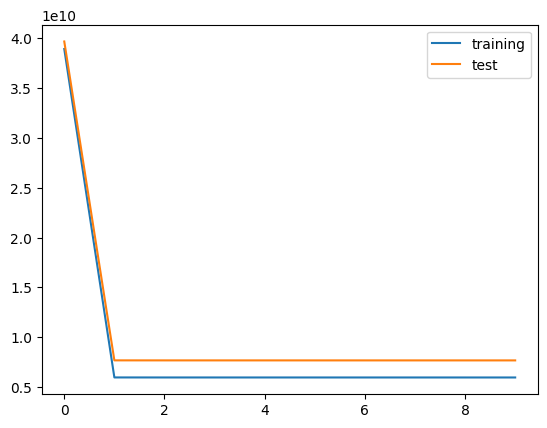

In [45]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [47]:
class MAPELoss(nn.Module):
    def __init__(self):
        super(MAPELoss, self).__init__()

    def forward(self, y_pred, y_true):
        epsilon = 1e-8  
        loss = torch.mean(torch.abs((y_true - y_pred) / (y_true + epsilon)))
        return loss * 100  
    
mape_loss = MAPELoss()
y_pred = model(X_test).squeeze()
loss_value = mape_loss(y_pred, y_test)
print(f"MAPE Loss: {loss_value.item():.4f}%")

MAPE Loss: 41.3073%
